In [1]:
from tensorflow import keras
from keras import layers
from keras import models
from keras import Sequential 
from keras.datasets import mnist
from keras.utils import to_categorical

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

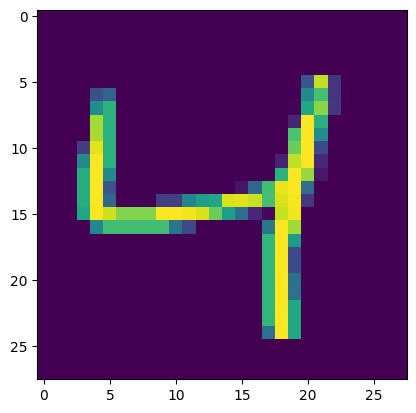

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [4]:
X_train = X_train/255
X_test = X_test/255

In [5]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [6]:
model=Sequential()
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [7]:
X_train=X_train.reshape((60000,28,28,1))
X_train=X_train.astype('float32')/255
X_test=X_test.reshape((10000,28,28,1))
X_test=X_test.astype('float32')/255
y_train=to_categorical(y_train)
y_test= to_categorical(y_test)

In [8]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5,batch_size=64)

test_acc=model.evaluate(X_test,y_test)
print(test_acc)

Epoch 1/5
938/938 [==============================] - 31s 15ms/step - loss: 1.3354 - accuracy: 0.5331
Epoch 2/5
938/938 [==============================] - 13s 14ms/step - loss: 0.3412 - accuracy: 0.8929
Epoch 3/5
938/938 [==============================] - 13s 14ms/step - loss: 0.2013 - accuracy: 0.9368
Epoch 4/5
938/938 [==============================] - 14s 15ms/step - loss: 0.1360 - accuracy: 0.9576
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.1126 - accuracy: 0.9673
[0.11258646100759506, 0.9672999978065491]


 use VGG16

In [15]:
pip show tensorflow-gpu


Note: you may need to restart the kernel to use updated packages.


In [13]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [16]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape
from tensorflow.keras.applications import VGG16

with tf.device('/GPU:0'):
    # Load MNIST dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to range [0, 1]

    # Resize images to meet VGG16 input size requirement (32x32)
    x_train_resized = np.array([np.pad(image, ((2, 2), (2, 2)), mode='constant') for image in x_train])
    x_test_resized = np.array([np.pad(image, ((2, 2), (2, 2)), mode='constant') for image in x_test])

    # Repeat single channel to create three channels
    x_train_resized = np.repeat(x_train_resized[..., np.newaxis], 3, -1)
    x_test_resized = np.repeat(x_test_resized[..., np.newaxis], 3, -1)

    # Load pre-trained VGG16 model without the top classification layer
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

    # Freeze the convolutional layers
    for layer in base_model.layers:
        layer.trainable = False

    # Create a new model by adding custom layers on top of the pre-trained VGG16 base model
    vgg16_model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        Dense(10, activation='softmax')
    ])

    # Compile the model
    vgg16_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    # Train the model
    vgg16_model.fit(x_train_resized, y_train, epochs=5, validation_data=(x_test_resized, y_test))

    # Evaluate the model
    test_loss, vgg16_test_acc =vgg16_model.evaluate(x_test_resized, y_test)
    print(f'Test accuracy: {vgg16_test_acc}')
        


    


Epoch 1/5
1875/1875 [==============================] - 87s 46ms/step - loss: 0.3354 - accuracy: 0.8983 - val_loss: 0.1758 - val_accuracy: 0.9423
Epoch 2/5
1875/1875 [==============================] - 86s 46ms/step - loss: 0.1581 - accuracy: 0.9495 - val_loss: 0.1388 - val_accuracy: 0.9544
Epoch 3/5
1875/1875 [==============================] - 88s 47ms/step - loss: 0.1325 - accuracy: 0.9565 - val_loss: 0.1204 - val_accuracy: 0.9601
Epoch 4/5
1875/1875 [==============================] - 86s 46ms/step - loss: 0.1182 - accuracy: 0.9617 - val_loss: 0.1189 - val_accuracy: 0.9608
Epoch 5/5
313/313 [==============================] - 17s 55ms/step - loss: 0.1026 - accuracy: 0.9660
Test accuracy: 0.9660000205039978


# Use ResNet50

In [24]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Add, Activation
from tensorflow.keras.applications import ResNet50


with tf.device('/GPU: 0'):
    # Load MNIST dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to range [0, 1]

    # Resize images to meet ResNet input size requirement (32x32)
    x_train_resized = np.array([np.pad(image, ((2, 2), (2, 2)), mode='constant') for image in x_train])
    x_test_resized = np.array([np.pad(image, ((2, 2), (2, 2)), mode='constant') for image in x_test])

    # Repeat single channel to create three channels
    x_train_resized = np.repeat(x_train_resized[..., np.newaxis], 3, -1)
    x_test_resized = np.repeat(x_test_resized[..., np.newaxis], 3, -1)

    # Load pre-trained ResNet50 model without the top classification layer
    base_model = ResNet50(weights=None, include_top=False, input_shape=(32, 32, 3))

    # Create a new model by adding custom layers on top of the pre-trained ResNet50 base model
    x = base_model.output
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    predictions = Dense(10, activation='softmax')(x)

    # Create the final model
    ResNet_model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    ResNet_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    # Train the model
    ResNet_model.fit(x_train_resized, y_train, epochs=5,batch_size=64,validation_data=(x_test_resized, y_test))

    # Evaluate the model
    test_loss, ResNet_test_acc = ResNet_model.evaluate(x_test_resized, y_test)
    print(f'Test accuracy: {ResNet_test_acc}')
    
    
    


ResourceExhaustedError: {{function_node __wrapped__AddV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:AddV2]

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Concatenate
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data to include channel dimension for grayscale images
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Convert class vectors to binary class matrices
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Define Dense Block
def dense_block(X, blocks, growth_rate):
    for i in range(blocks):
        X_b = X
        X = Conv2D(4 * growth_rate, kernel_size=1, padding='same', activation='relu')(X)
        X = Conv2D(growth_rate, kernel_size=3, padding='same', activation='relu')(X)
        X = Concatenate(axis=-1)([X_b, X])
    return X

# Define Transition Block
def transition_block(X, reduction):
    X = Conv2D(int(X.shape[-1] * reduction), kernel_size=1, padding='same', activation='relu')(X)
    X = AveragePooling2D(pool_size=(2,2), strides=2,padding='same')(X)
    return X

# Define DenseNet model
def DenseNet(input_shape, num_classes, dense_blocks, growth_rate, reduction):
    X_input = Input(input_shape)

    # Initial convolutional layer
    X = Conv2D(64, kernel_size=7, strides=2, padding='same', activation='relu')(X_input)
    X = MaxPooling2D(pool_size=3, strides=2, padding='same')(X)

    # Dense Blocks and Transition Blocks
    for i in range(len(dense_blocks)):
        X = dense_block(X, dense_blocks[i], growth_rate)
        if i != len(dense_blocks) - 1:
            X = transition_block(X, reduction)

    # Final layers
    X = AveragePooling2D(pool_size=7, strides=1)(X)
    X = Flatten()(X)
    X = Dense(num_classes, activation='softmax')(X)

    # Create model
    model = Model(inputs=X_input, outputs=X, name='DenseNet')
    return model

# Define DenseNet parameters
input_shape = (28, 28, 1)
dense_blocks = [6, 12, 24, 16]  # Number of dense blocks per layer
growth_rate = 12  # Growth rate controls the number of channels added in each layer
reduction = 0.5  # Reduction factor for transition blocks

# Build the DenseNet model
DenseNet_model = DenseNet(input_shape, num_classes, dense_blocks, growth_rate, reduction)

# Compile the model
DenseNet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
DenseNet_model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = DenseNet_model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

In [ ]:
from keras.models import load_model
model.save('mnist.h5')